## 단계2. 탐색적 데이터 분석

## 0.미션

* 1.개별 변수 분석하기
    * 앞서 생성된 각 변수들 특히 추가로 생성한 변수들에 대해서 단변량 분석을 수행합니다.
    * 시각화 : Histogram, Boxplot, Barplot
    * 통계량 : 기초 통계량.
    * [옵션] 날짜 요소 관점을 추가해서 EDA 를 수행하시오.
* 2.Features와 Target의 관계 분석하기
    * Target은 숫자입니다.
    * 숫자형 feature들과 Target 과의 관계
        * 한꺼번에 상관관계를 확인하는 방법을 이용하여 분석합시다.
    * 범주형 feature들과 Target
        * sns.barplot, t-검정, 분산분석 등을 이용하여 분석합니다.
    * Target과 관련이 높은 feature와 그렇지 않은 feature를 정리해 봅시다.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as spst
import joblib

In [ ]:
data= joblib.load('/content/drive/MyDrive/미니프로젝트/2차_미세먼지 농도 예측, 장애인 콜택시 대기시간 예측 머신러닝 모델/2023.09.12_미니프로젝트2차_2일차 장애인 콜택시 대기시간 예측/data1.pkl')

In [ ]:
data.columns

Index(['Date', 'car_cnt', 'request_cnt', 'ride_cnt', 'waiting_time', 'fare',
       'distance', 'temp_max', 'temp_min', 'rain(mm)', 'humidity_max(%)',
       'humidity_min(%)', 'sunshine(MJ/m2)', 'weekday', 'month', 'season',
       'year', 'holiday', 'avg7day', 'ride_rate'],
      dtype='object')

## 2.EDA : 1단계 - 개별 정보 분석하기

* **세부요구사항**
    * 의미 있는 변수들을 7개 이상 선정하고 단변량분석을 수행합니다.
    * [옵션] 각 변수에 대한 탐색시, 요일별, 월별, 연도별로 나눠서도 확인해보세요.
    * 단변량 분석을 위한 코드를 함수로 작성하고 수행하세요.

### (1) 단변량 분석 함수 작성
* **세부요구사항**
    * 코드가 반복되므로, 시각화와 기초통계량을 한꺼번에 처리하는 함수를 생성합시다.
    * 포함되어야 할 내용 :
        * 기초통계량
            * 숫자 : .describe()
            * 범주 : 범주별 빈도수/비율
        * 시각화


In [ ]:
data_copy = data.copy()

In [ ]:
# 숫자형 변수 분석
def func_numeric(var, df):
    data = df

    print(f'====={var}====')
    print()
    print('평균 : ', data[var].mean())
    print()
    print('====기초통계량====')
    display(data[var].describe())
    print()

    print('====히스토그램 =====')
    sns.histplot(x=var, data=data, kde=True)
    plt.grid()
    plt.show()

    print('====박스플롯====')
    plt.boxplot(data[var], vert=False)
    plt.grid()
    plt.show()

In [ ]:
# 범주형 변수 분석
def func_categoric(var, df):
    data = df

    print()
    print('====범주별 개수 확인====')
    print(data[var].value_counts())
    print()
    print('====범주별 비율 확인====')
    print(data[var].value_counts(normalize=True))

    print()
    print('====바 차트====')
    sns.countplot(x = var, data = data)
    plt.grid()
    plt.show()

=====car_cnt====

평균 :  418.7552208147895

====기초통계량====


count    2921.000000
mean      418.755221
std       133.747019
min       132.000000
25%       278.000000
50%       454.000000
75%       522.000000
max      1413.000000
Name: car_cnt, dtype: float64


====히스토그램 =====


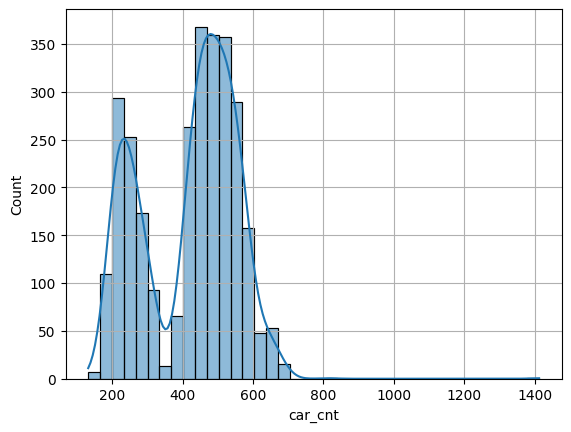

====박스플롯====


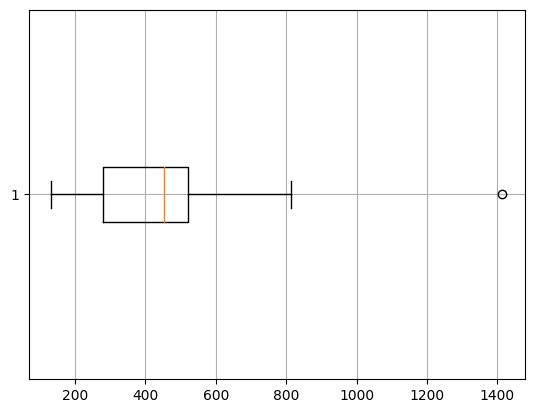

**************************************************
=====request_cnt====

평균 :  3926.2098596371106

====기초통계량====


count    2921.000000
mean     3926.209860
std      1509.649338
min       527.000000
25%      2162.000000
50%      4721.000000
75%      5110.000000
max      6182.000000
Name: request_cnt, dtype: float64


====히스토그램 =====


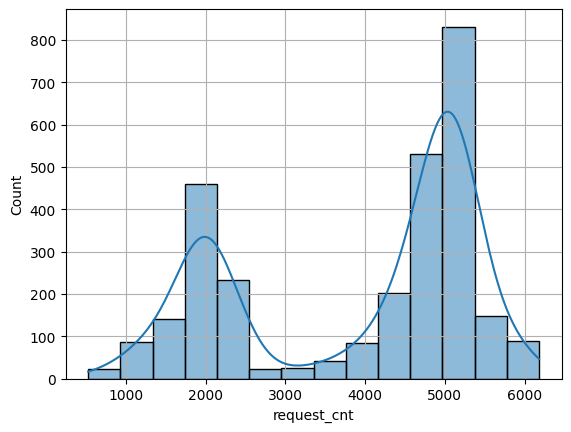

====박스플롯====


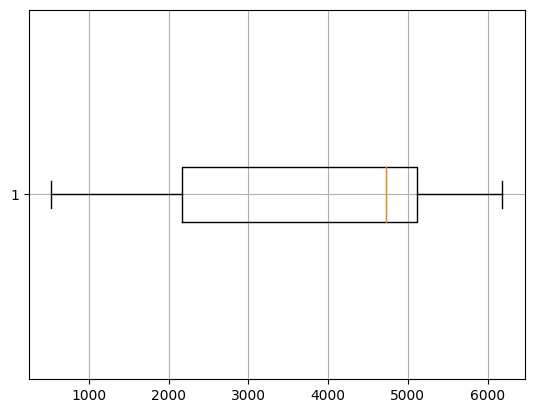

**************************************************
=====ride_cnt====

평균 :  3284.401232454639

====기초통계량====


count    2921.000000
mean     3284.401232
std      1249.080267
min       462.000000
25%      1779.000000
50%      3933.000000
75%      4241.000000
max      5189.000000
Name: ride_cnt, dtype: float64


====히스토그램 =====


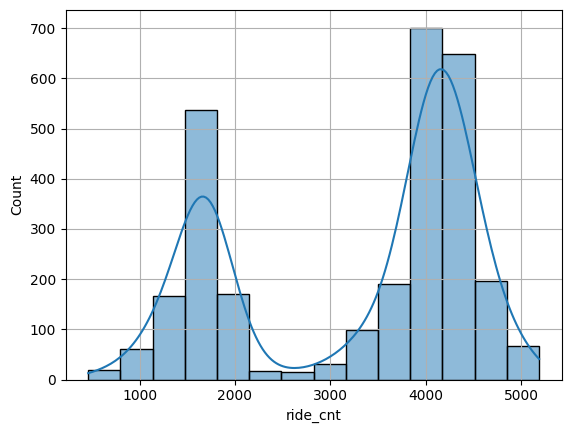

====박스플롯====


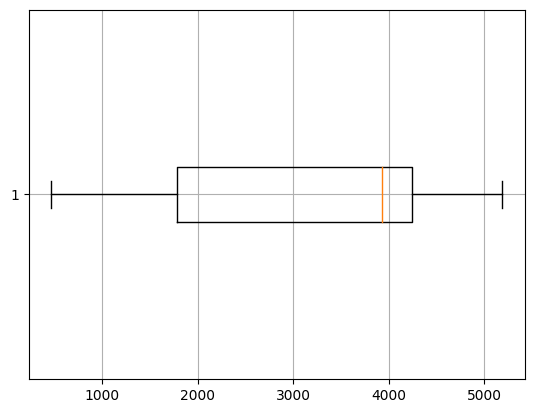

**************************************************
=====waiting_time====

평균 :  40.30794248545019

====기초통계량====


count    2921.000000
mean       40.307942
std        14.100434
min        17.200000
25%        29.600000
50%        38.200000
75%        48.600000
max        96.100000
Name: waiting_time, dtype: float64


====히스토그램 =====


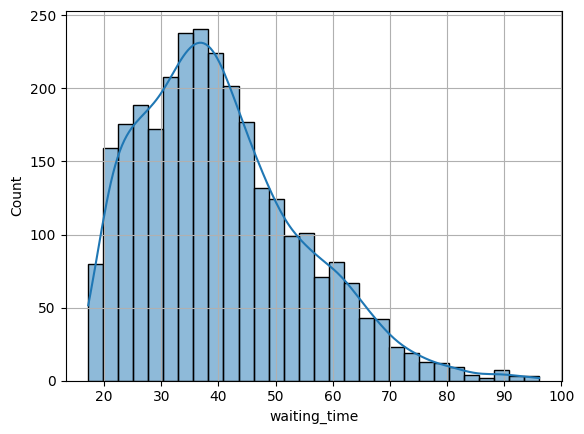

====박스플롯====


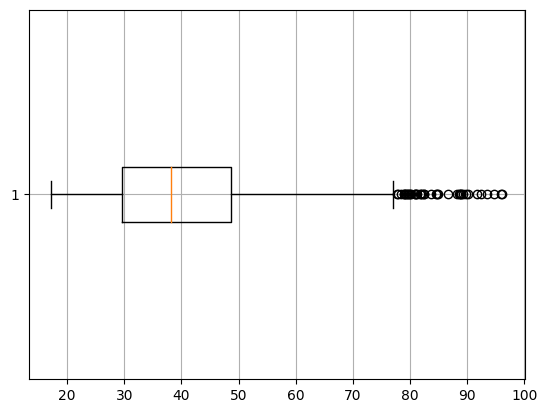

**************************************************
=====fare====

평균 :  2304.267716535433

====기초통계량====


count    2921.000000
mean     2304.267717
std       107.278144
min      2131.000000
25%      2228.000000
50%      2257.000000
75%      2401.000000
max      2733.000000
Name: fare, dtype: float64


====히스토그램 =====


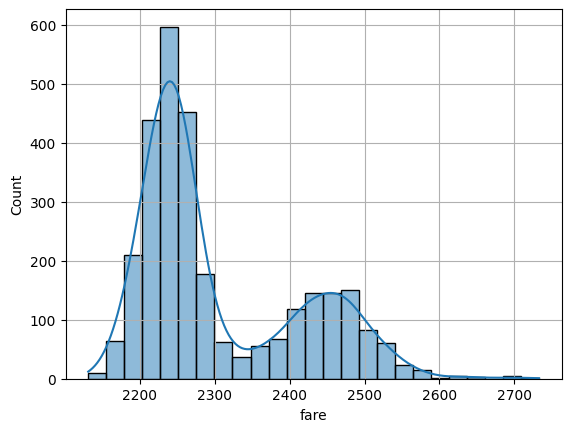

====박스플롯====


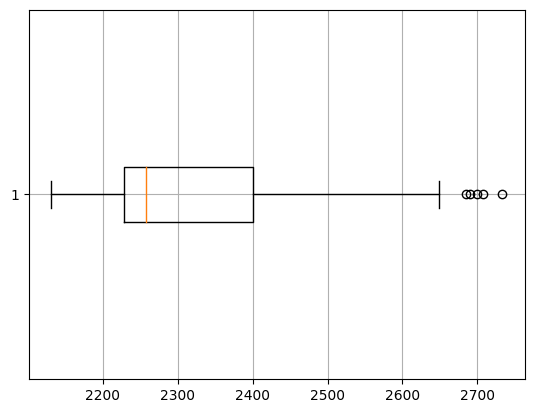

**************************************************
=====distance====

평균 :  9253.437863745292

====기초통계량====


count     2921.000000
mean      9253.437864
std       1019.367122
min       7672.000000
25%       8521.000000
50%       8821.000000
75%      10154.000000
max      14136.000000
Name: distance, dtype: float64


====히스토그램 =====


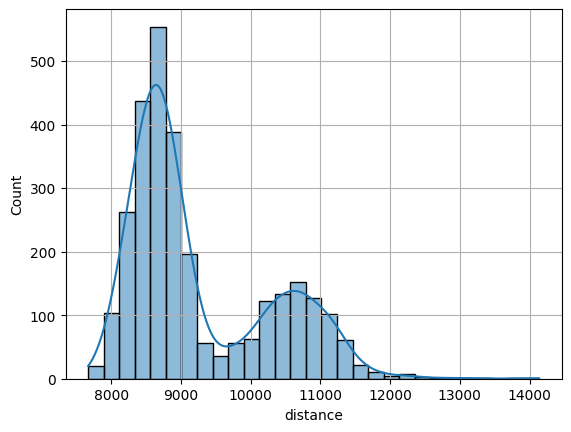

====박스플롯====


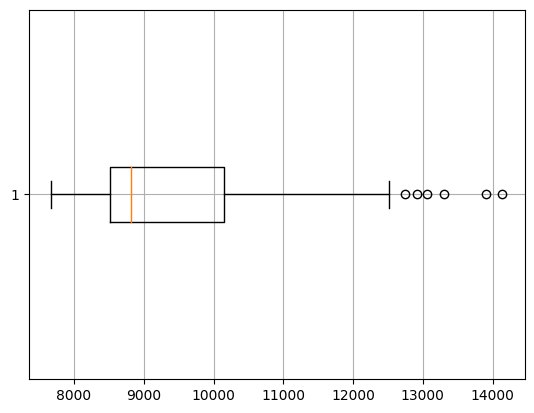

**************************************************
=====temp_max====

평균 :  18.07740499828826

====기초통계량====


count    2921.000000
mean       18.077405
std        10.706655
min       -11.200000
25%         9.000000
50%        19.700000
75%        27.400000
max        39.400000
Name: temp_max, dtype: float64


====히스토그램 =====


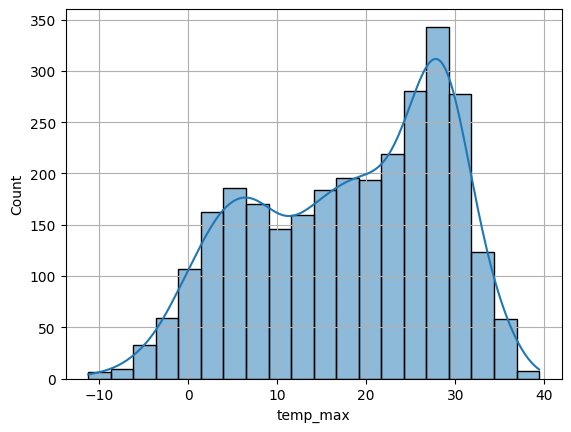

====박스플롯====


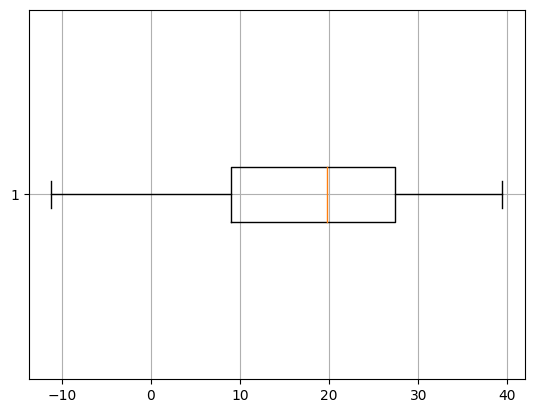

**************************************************
=====temp_min====

평균 :  9.414618281410476

====기초통계량====


count    2921.000000
mean        9.414618
std        10.784649
min       -18.500000
25%         0.500000
50%        10.000000
75%        18.900000
max        30.400000
Name: temp_min, dtype: float64


====히스토그램 =====


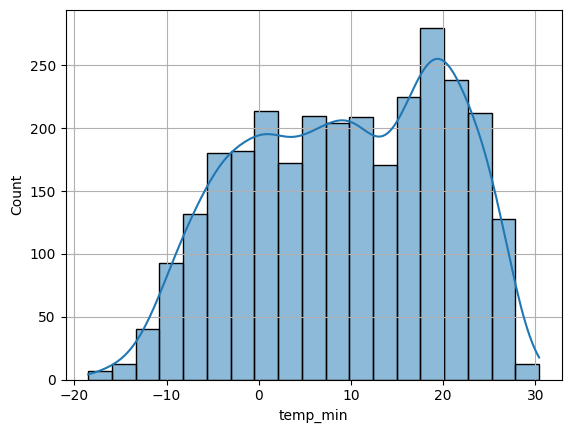

====박스플롯====


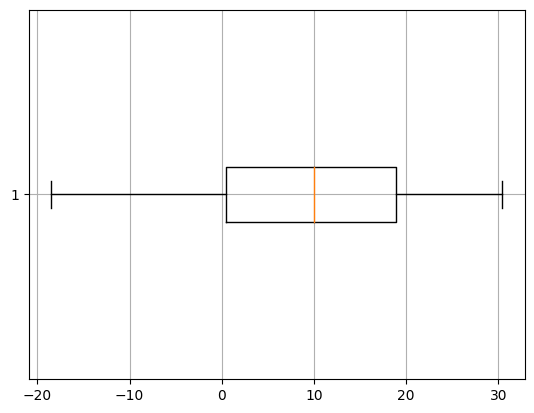

**************************************************
=====rain(mm)====

평균 :  3.356761383087983

====기초통계량====


count    2921.000000
mean        3.356761
std        12.597807
min         0.000000
25%         0.000000
50%         0.000000
75%         0.300000
max       178.900000
Name: rain(mm), dtype: float64


====히스토그램 =====


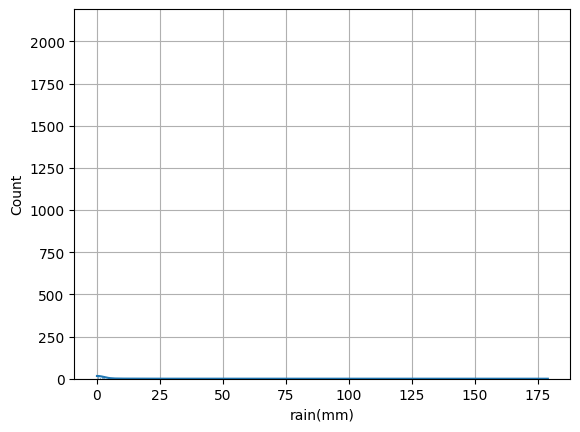

====박스플롯====


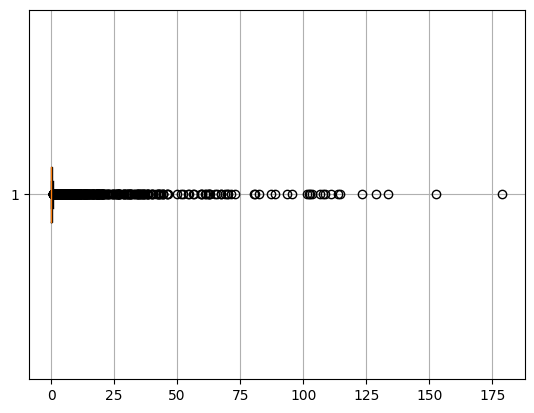

**************************************************
=====humidity_max(%)====

평균 :  79.10407394727832

====기초통계량====


count    2921.000000
mean       79.104074
std        14.024176
min        29.000000
25%        70.000000
50%        82.000000
75%        90.000000
max       100.000000
Name: humidity_max(%), dtype: float64


====히스토그램 =====


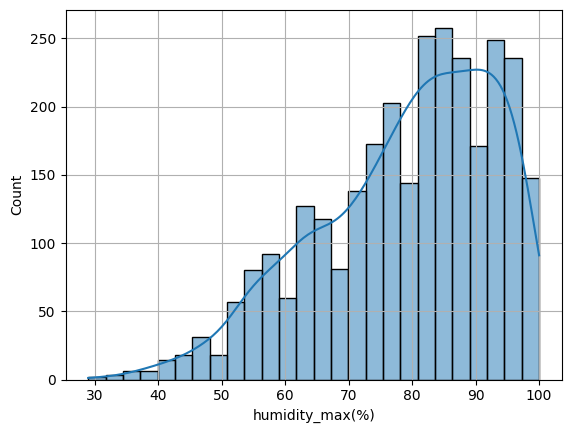

====박스플롯====


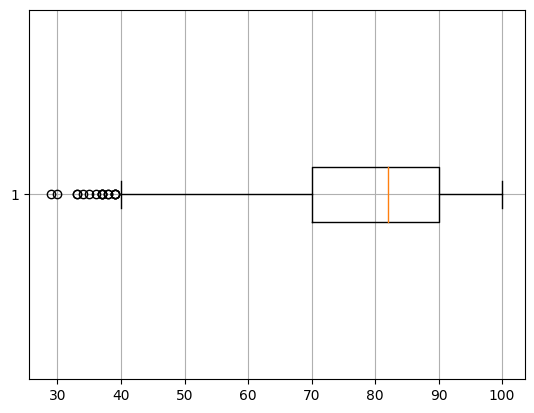

**************************************************
=====humidity_min(%)====

평균 :  41.119411160561455

====기초통계량====


count    2921.000000
mean       41.119411
std        16.401564
min         7.000000
25%        29.000000
50%        39.000000
75%        51.000000
max        98.000000
Name: humidity_min(%), dtype: float64


====히스토그램 =====


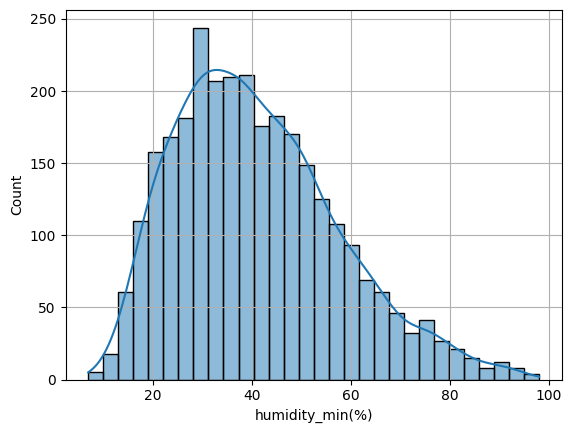

====박스플롯====


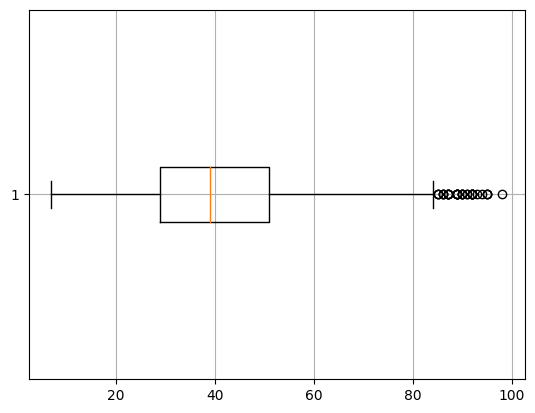

**************************************************
=====sunshine(MJ/m2)====

평균 :  13.497692571037316

====기초통계량====


count    2921.000000
mean       13.497693
std         6.941039
min         0.000000
25%         8.240000
50%        12.680000
75%        18.580000
max        30.790000
Name: sunshine(MJ/m2), dtype: float64


====히스토그램 =====


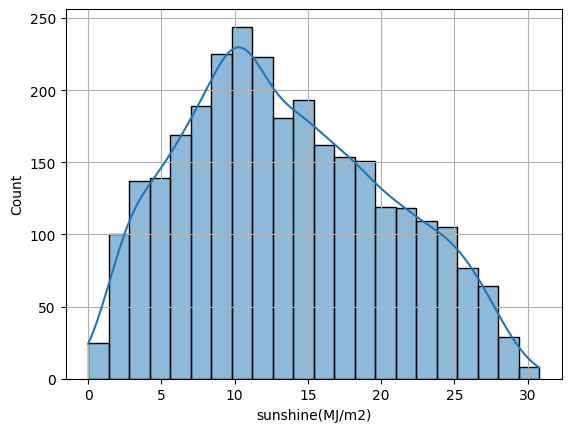

====박스플롯====


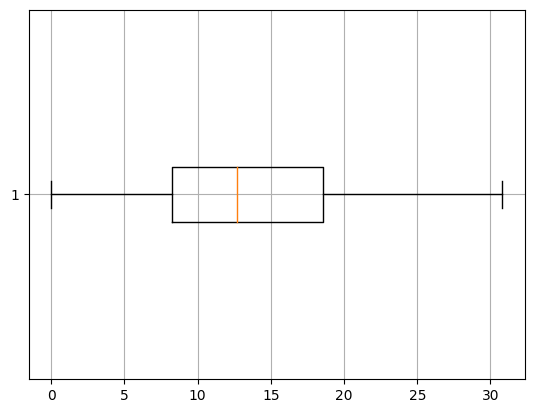

**************************************************
=====holiday====

평균 :  0.040739472783293394

====기초통계량====


count    2921.000000
mean        0.040739
std         0.197720
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         1.000000
Name: holiday, dtype: float64


====히스토그램 =====


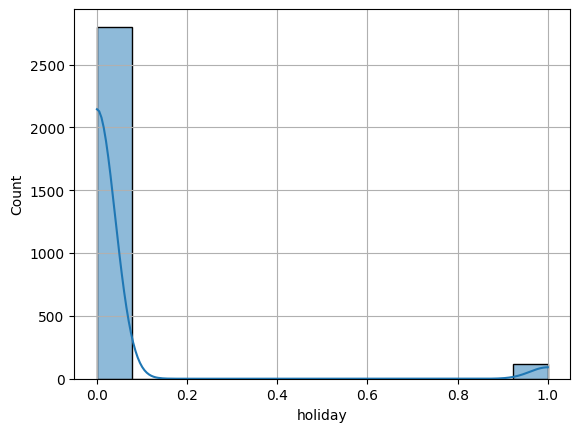

====박스플롯====


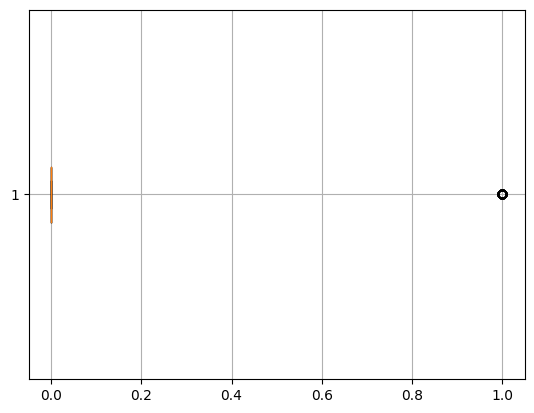

**************************************************
=====avg7day====

평균 :  40.32223474638569

====기초통계량====


count    2915.000000
mean       40.322235
std        12.031515
min        18.800000
25%        31.342857
50%        39.042857
75%        47.028571
max        83.928571
Name: avg7day, dtype: float64


====히스토그램 =====


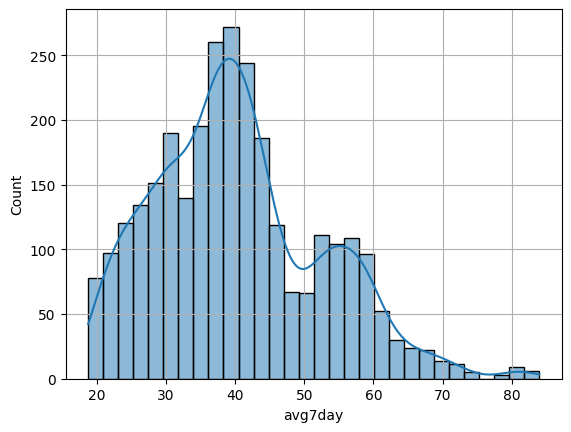

====박스플롯====


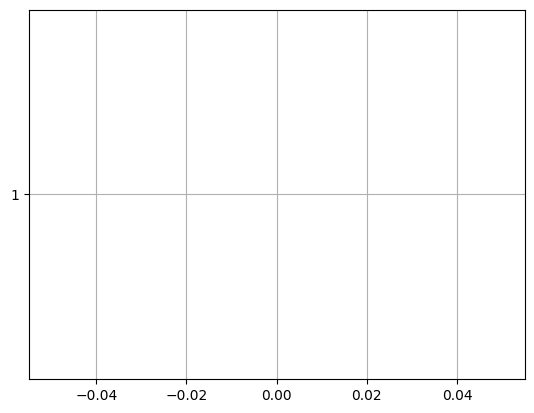

**************************************************
=====ride_rate====

평균 :  84.15795506728293

====기초통계량====


count    2921.000000
mean       84.157955
std         5.218070
min        59.699625
25%        80.595581
50%        84.565979
75%        87.772194
max        96.884422
Name: ride_rate, dtype: float64


====히스토그램 =====


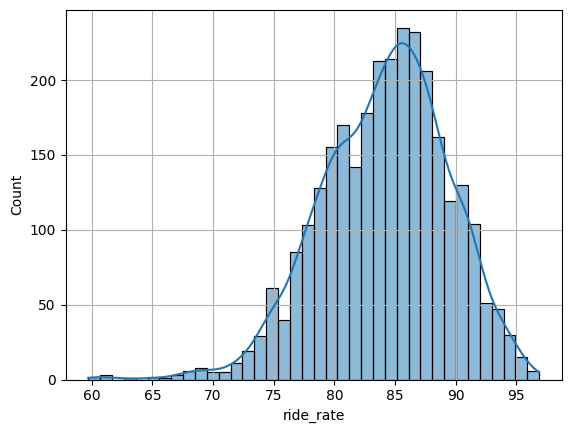

====박스플롯====


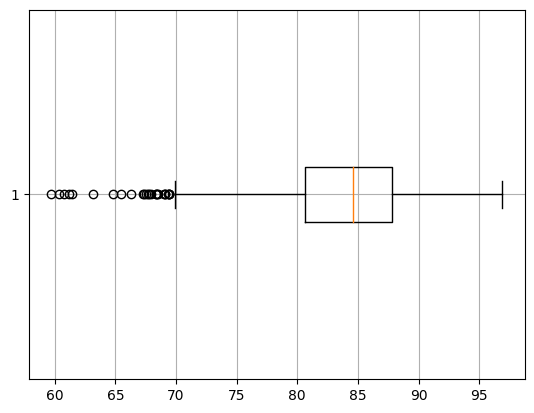

**************************************************


In [ ]:
columns = ['car_cnt', 'request_cnt', 'ride_cnt', 'waiting_time', 'fare',
       'distance', 'temp_max', 'temp_min', 'rain(mm)', 'humidity_max(%)',
       'humidity_min(%)', 'sunshine(MJ/m2)','holiday', 'avg7day', 'ride_rate']

for e in columns:
    func_numeric(e, data_copy)
    print('*' * 50)

## 3.EDA 2단계 - feature와 target 비교 분석하기

* **세부요구사항**
    * 숫자 feature --> target
        * 전체 상관계수 구하고 시각화(heatmap)해서 파악해봅시다.
        * 상위 n개의 feature와 target의 상점도를 확인해봅시다.
    * 범주 feature --> target
        * 시각화 : 평균 비교 barplot
        * 수치화 : t-test, anova
    * 이번 단계에서는 함수 생성은 선택사항 입니다.

#### 1) 전체 상관계수 시각화

In [ ]:
target = 'waiting_time'

<ipython-input-10-4ab4dc81f8f1>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr(), annot=True, cmap='Blues')


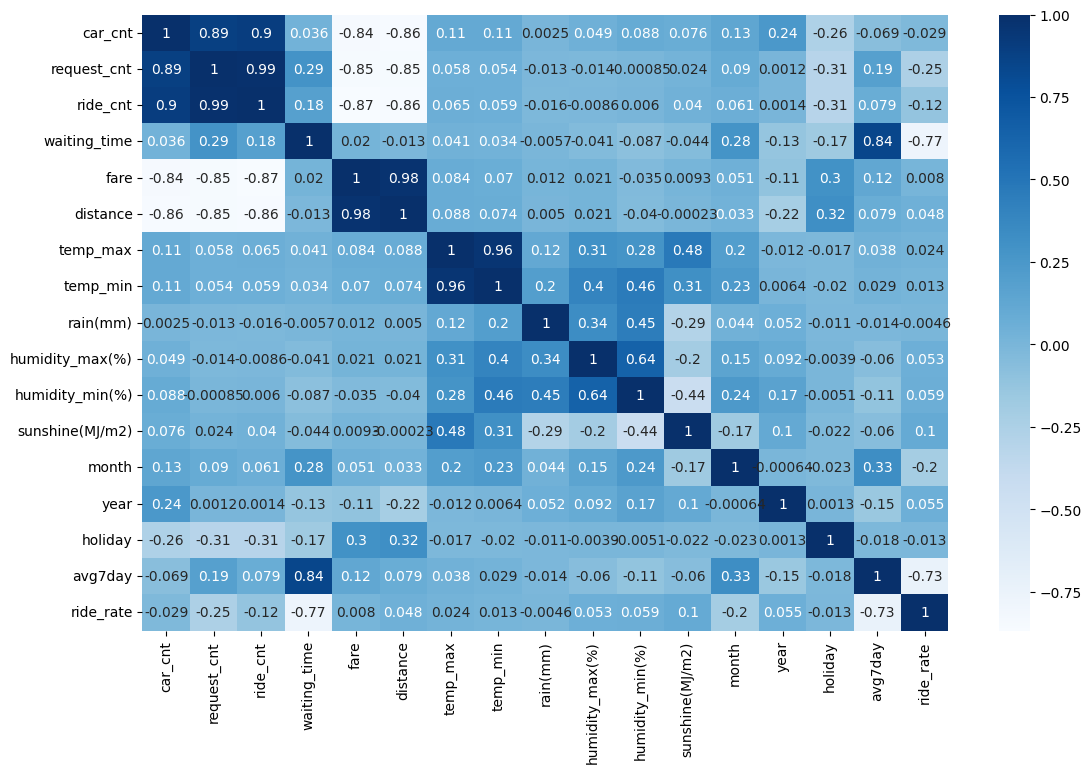

In [ ]:
data.corr
plt.figure(figsize=(13, 8))
sns.heatmap(data.corr(), annot=True, cmap='Blues')
plt.show()

In [ ]:
corr = data.corr()
corr[target].sort_values(ascending=False)

<ipython-input-11-1d18fc3850ac>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = data.corr()


waiting_time       1.000000
avg7day            0.842061
request_cnt        0.291783
month              0.283033
ride_cnt           0.184201
temp_max           0.040863
car_cnt            0.035641
temp_min           0.034330
fare               0.020279
rain(mm)          -0.005741
distance          -0.013169
humidity_max(%)   -0.040792
sunshine(MJ/m2)   -0.044288
humidity_min(%)   -0.087113
year              -0.125793
holiday           -0.169203
ride_rate         -0.770449
Name: waiting_time, dtype: float64

In [ ]:
# t-test (범주가 2개인 경우 : holidays)
cols = ['holiday']
for col in cols:
    a = data.loc[data[col]==0, target]
    b = data.loc[data[col]==1, target]
    print(col, ":", spst.ttest_ind(a, b))

holiday : TtestResult(statistic=9.275413836466232, pvalue=3.3426836209230024e-20, df=2919.0)


In [ ]:
# ANOVA(분산 분석) (범주가 3개 이상인 경우 : weekday, month, season)
cols = ['weekday', 'month', 'season']
for col in cols:
    classes = data[col].unique()
    for i in range(len(classes)):
        globals()[f'p_{i}'] = data.loc[data[col] == classes[i], target]
    input_list = [globals()[f'p_{i}'] for i in range(len(classes))]
    print(col, ":", spst.f_oneway(*input_list))

weekday : F_onewayResult(statistic=15.725618013944116, pvalue=7.483477327524786e-18)
month : F_onewayResult(statistic=27.044548509210877, pvalue=2.3907707500044232e-54)
season : F_onewayResult(statistic=32.66979629669151, pvalue=9.164948744981401e-21)


## 4.변수 정리

* Target과 관련성이 높은 feature와 그렇지 않은 feature를 정리합니다.
* 여기서의 판단은 다소 주관적입니다. 조금 정확하지 않아도 괜찮습니다.
* 다음 단계 모델링에서 관련이 적은 변수는 포함시키거나, 제외를 고려할때 활용합니다.

* 강한 관계의 변수

In [ ]:
high_cols = ['avg7day', 'ride_rate', 'holiday', 'weekday', 'month', 'season']

* (거의) 관계가 없는 변수

In [ ]:
data.head()

,Date,car_cnt,request_cnt,ride_cnt,waiting_time,fare,distance,temp_max,temp_min,rain(mm),humidity_max(%),humidity_min(%),sunshine(MJ/m2),weekday,month,season,year,holiday,avg7day,ride_rate
0,2015-01-01,213,1023,924,23.2,2427,10764,-2.0,-8.9,0.0,63.0,28.0,9.07,Thursday,1,Winter,2015,1,NaN,90.322581
1,2015-01-02,420,3158,2839,17.2,2216,8611,2.4,-9.2,0.0,73.0,37.0,8.66,Friday,1,Winter,2015,0,NaN,89.898670
2,2015-01-03,209,1648,1514,26.2,2377,10198,8.2,0.2,0.0,89.0,58.0,5.32,Saturday,1,Winter,2015,0,NaN,91.868932
3,2015-01-04,196,1646,1526,24.5,2431,10955,7.9,-0.9,0.0,95.0,52.0,6.48,Sunday,1,Winter,2015,0,NaN,92.709599
4,2015-01-05,421,4250,3730,26.2,2214,8663,4.1,-7.4,3.4,98.0,29.0,10.47,Monday,1,Winter,2015,0,NaN,87.764706


In [ ]:
col = ['Date', 'waiting_time', 'avg7day', 'ride_rate', 'holiday', 'weekday', 'month', 'season']
final_data = data[col]
final_data

,Date,waiting_time,avg7day,ride_rate,holiday,weekday,month,season
0,2015-01-01,23.2,NaN,90.322581,1,Thursday,1,Winter
1,2015-01-02,17.2,NaN,89.898670,0,Friday,1,Winter
2,2015-01-03,26.2,NaN,91.868932,0,Saturday,1,Winter
3,2015-01-04,24.5,NaN,92.709599,0,Sunday,1,Winter
4,2015-01-05,26.2,NaN,87.764706,0,Monday,1,Winter
...,...,...,...,...,...,...,...,...
2916,2022-12-26,39.2,43.485714,82.898290,0,Monday,12,Winter
2917,2022-12-27,44.4,42.771429,82.590949,0,Tuesday,12,Winter
2918,2022-12-28,44.8,43.514286,82.207287,0,Wednesday,12,Winter
2919,2022-12-29,52.5,42.957143,80.895238,0,Thursday,12,Winter


In [ ]:
import joblib

joblib.dump(final_data, '/content/drive/MyDrive/미니프로젝트/2차_미세먼지 농도 예측, 장애인 콜택시 대기시간 예측 머신러닝 모델/2023.09.12_미니프로젝트2차_2일차 장애인 콜택시 대기시간 예측/data2.pkl')

['/content/drive/MyDrive/미니프로젝트/2차_미세먼지 농도 예측, 장애인 콜택시 대기시간 예측 머신러닝 모델/2023.09.12_미니프로젝트2차_2일차 장애인 콜택시 대기시간 예측/data2.pkl']